<a href="https://colab.research.google.com/github/gurudattaxd/Linear-regression/blob/main/LinearRegressionFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

medical_charges_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
urlretrieve(medical_charges_url, 'medical.csv')

medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
pip install matplotlib plotly seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns

sns.set_style('darkgrid')
#matplotlib.rcParams['font.size']='14' # Now you can use matplotlib
#matplotlib.rcParams['figure.figsize']= (10,6)
#matplotlib.rcParams['figure.facecolor']= '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df, x='age',
             marginal = 'box',
             nbins=47,
             title = 'DISTRIBUTION OF AGE')
fig.update_layout(bargap=0.1)
fig.show()




In a histogram, bins represent the groups of data points that fall within certain intervals of the x-axis.
 By specifying nbins=47, you're telling the px.histogram function to create 47 such bins for the distribution of age, which determines the width of each bar in the histogram
                                          
                                         

In [ ]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [ ]:
fig = px.histogram(medical_df, x='bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title= "DISTRIBUTION OF BMI")
fig.update_layout(bargap= 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'grey'],

             title = 'Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
medical_df.sex.value_counts()

,count
sex,
male,676
female,662


In [ ]:
medical_df.smoker.describe()

,smoker
count,1338
unique,2
top,no
freq,1064


In [ ]:
px.histogram(medical_df, x='smoker', color = 'sex', title = 'smoker')

In [ ]:
px.scatter(medical_df, x='bmi', y='charges', color = 'smoker', opacity = 0.8, hover_data=['sex'], title = 'BMI vs Charges')

In [ ]:
px.violin(medical_df,
          x='children',
          y = 'charges')

Correlation


As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [ ]:
#the relationship between two coloumns wheather they grow together or not is expressed using a numerical measure called correlation coefficient
#can be computed using .corr method of panda series

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

We can compute the relation between categorical coloumns as well, we first need to convert it into a numeric coloumn

In [ ]:
smoker_values={'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric



#.map takes either a function or a dictionary and it applies it to every value, in this case the dictionary converts the no into 0 and yes to 1
# the no value will be changed to 0 and yes value will be changed to 1

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
# the greater the value of the relationship, the stronger is the relationship and vice versa
# -1 and 1 indicate a perfectly linear relationship (1 is the max value)

In [ ]:
medical_df.select_dtypes(include=np.number).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


LINEAR REGRESSION USING SINGLE FEATURE



In [ ]:
#creating a dataframe containing the data for non smokers

non_smoker_df = medical_df[medical_df.smoker == 'no']

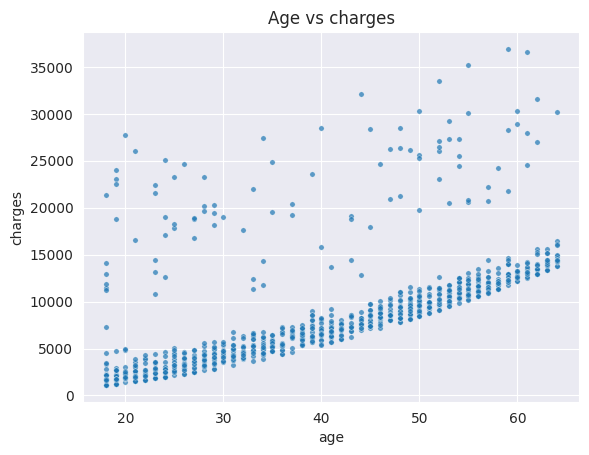

In [ ]:
# let's visualize the relationship between "age" and "charges"

plt.title('Age vs charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);  #used seaborn for an non interactive graph

#px.scatter(non_smoker_df, x='age', y='charges', opacity=0.7, title='Age vs charges')

Line on x and y co-ordinates have the formula:

y = wx+b; where w is slope and b is the intercept.
b is the point at which the line intersects with y-axis, it is called as intercept.

In [ ]:
#charges = w*age + b, this equation is called as linear regression model because it is modelling the relation between age and charges
#w and b are called as parameters of model

In [ ]:
def estimate_charges(age,w,b):
  return w*age + b

#the function estimate charges is our first model

In [ ]:
w =50
b = 100
estimate_charges(40,w,b)

2100

In [ ]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'estimated charges')

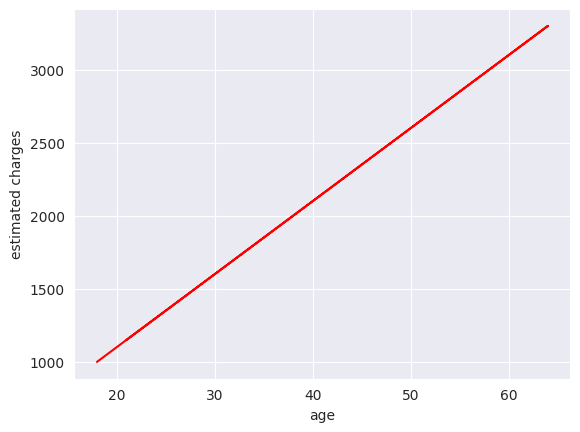

In [ ]:
plt.plot(ages,estimated_charges, 'r-')
plt.xlabel('age')
plt.ylabel('estimated charges')

#We can overlay this line on the actual data, so see how well our model fits the data.

In the plt.scatter() function from Matplotlib:

s: This parameter sets the size of the markers in the scatter plot. In your case, s=8 means each marker will have a size of 8 points.

alpha: This parameter controls the transparency of the markers. It ranges from 0 to 1, where 0 means fully transparent and 1 means fully opaque. In your case, alpha=0.8 makes the scatter plot markers slightly transparent.

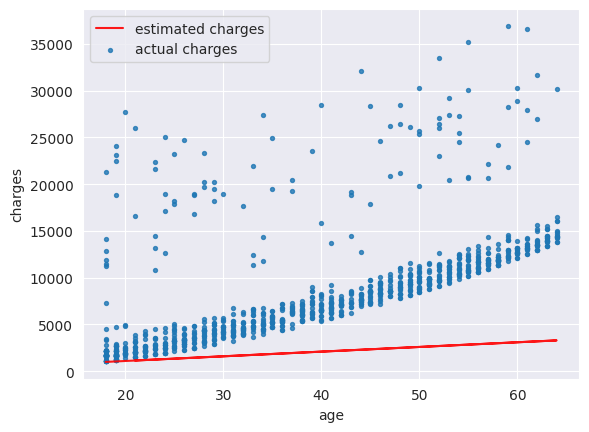

In [ ]:
target = non_smoker_df.charges

plt.plot(ages,estimated_charges, 'r-', alpha = 0.9)
plt.scatter(ages,target, s=8, alpha = 0.8)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend(['estimated charges', 'actual charges'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of
w
w and
b
b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.



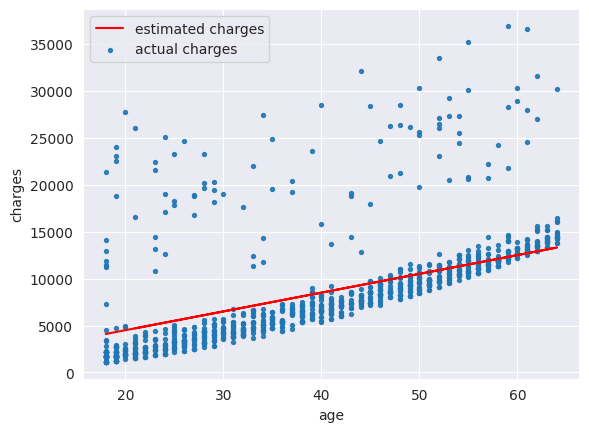

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages,w,b)


  plt.plot(ages, estimated_charges, 'r')
  plt.scatter(ages, target, s=8, alpha = 0.9)
  plt.legend(['estimated charges', 'actual charges'])
  plt.xlabel('age')
  plt.ylabel('charges')

try_parameters(200,500)

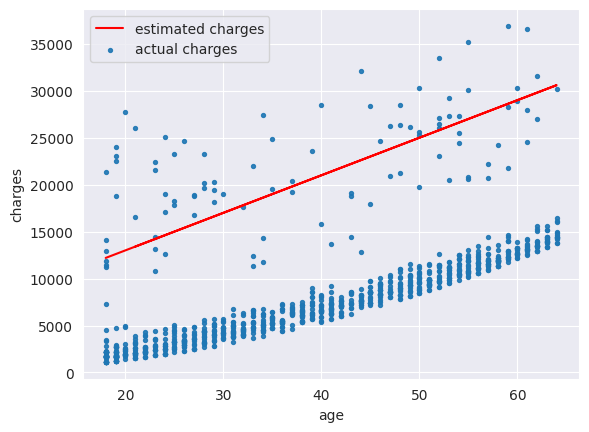

In [ ]:
try_parameters(400,5000)

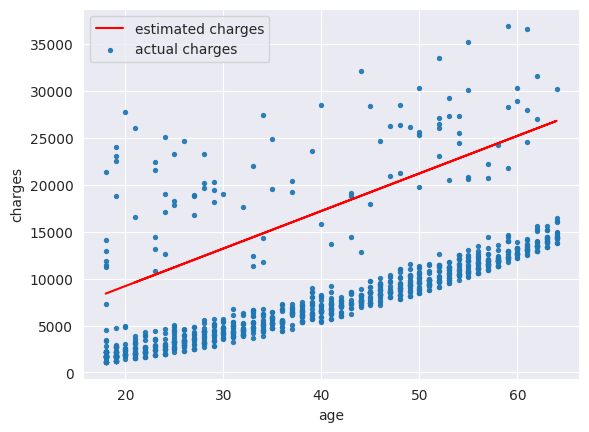

In [ ]:
try_parameters(400,1200)

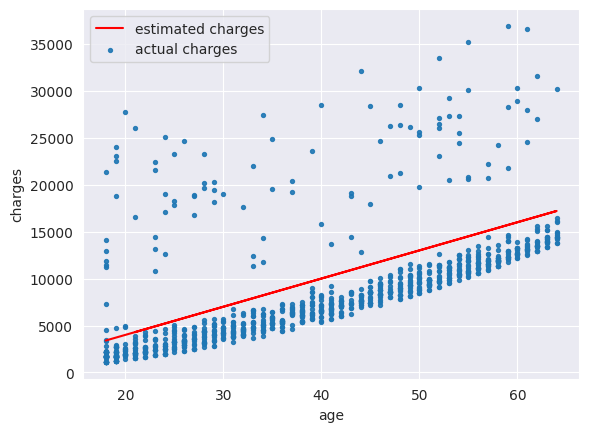

In [ ]:
try_parameters(300,-2000)

In [ ]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result


In [ ]:
# RMSE = sqrt [(Σ(target – predicted)²) / n]

In [ ]:
def rmse(predictions, targets):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

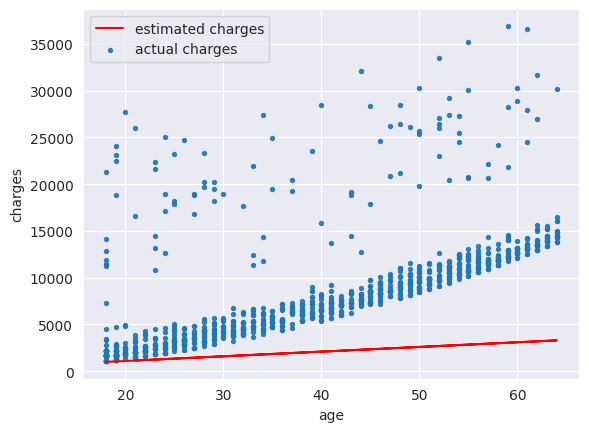

In [ ]:
try_parameters(w,b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w,b)

In [ ]:
rmse(targets,predicted)

8461.949562575493

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$8461*.

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


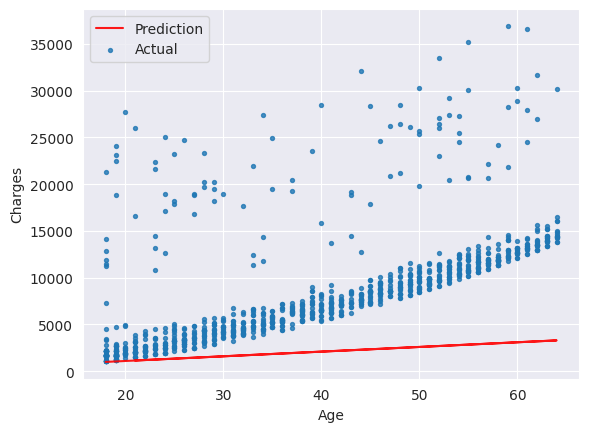

In [ ]:
try_parameters(50,100)

RMSE Loss:  4991.993804156943


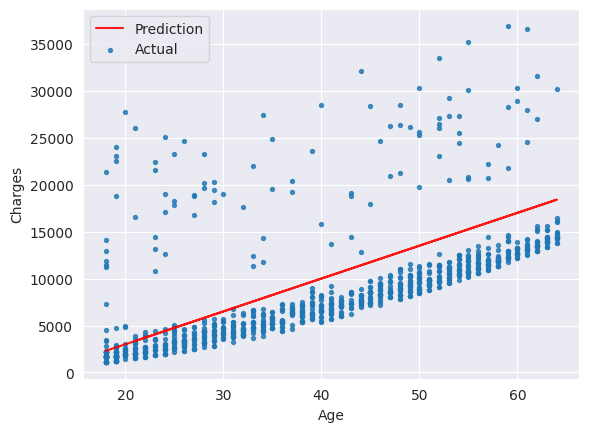

In [ ]:
try_parameters(350,-4000)

In [ ]:
pip install scikit-learn --quiet

Scikit learn contains functions , modules for doing machine learning with python

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', target.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rmse(targets,predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters w and b of the model are stored in the `coef_` and `intercept_` properties.

In [ ]:
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


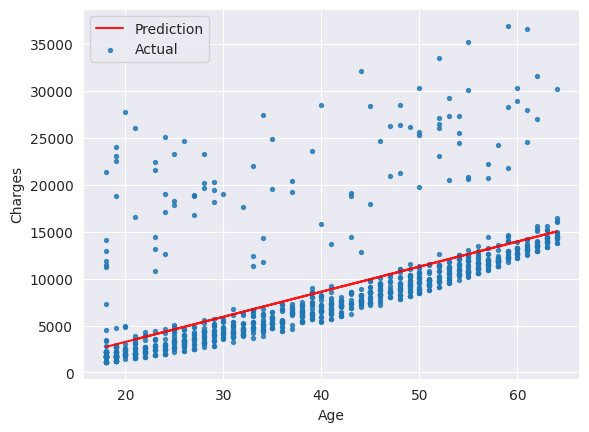

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor()

In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', target.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs, targets)

SGDRegressor()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 2099.05947832,  6946.04024492, 15255.15013051])

In [ ]:
predictions = model.predict(inputs)
predictions

array([ 367.99491882, 3830.12403782, 5561.18859732, ...,  367.99491882,
        367.99491882, 1406.63365452])

In [ ]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rmse(targets,predictions)

4838.728091074469

In [ ]:
# w
model.coef_

array([346.2129119])

In [ ]:
# b
model.intercept_

array([-5863.83749538])

RMSE Loss:  4838.728091074469


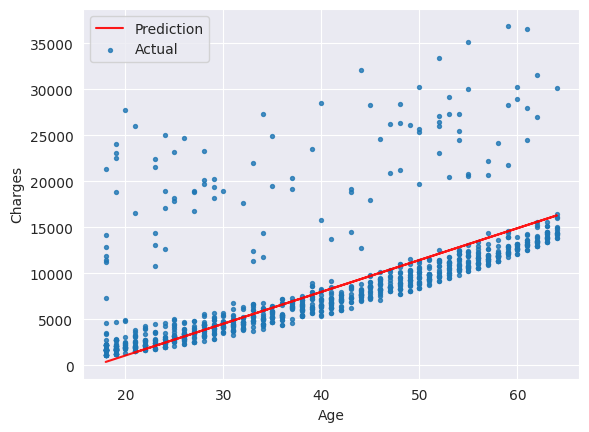

In [ ]:
try_parameters(model.coef_, model.intercept_)

#<B> <I> EXERCISE:</B> </I>
Till now we did it for non smokers, now train a linear regression model to estimate medical charges for smokers.

In [ ]:
#will do it in a new notebook

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

In [ ]:
#As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [ ]:
# continue video from 1:37 H (24/9/24)

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', color = 'smoker', opacity = 0.8, hover_data=['sex'], title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



In [ ]:
#The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

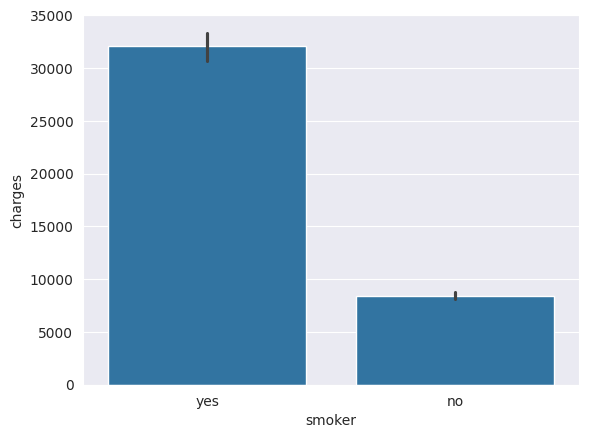

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

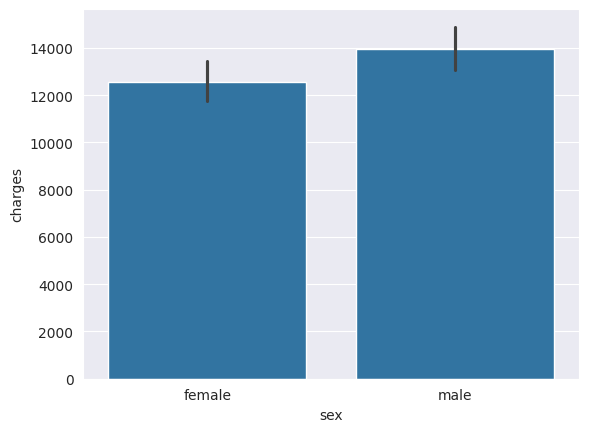

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


this does have a significant impact on the loss.

In [ ]:
#ONE HOT ENCODING


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

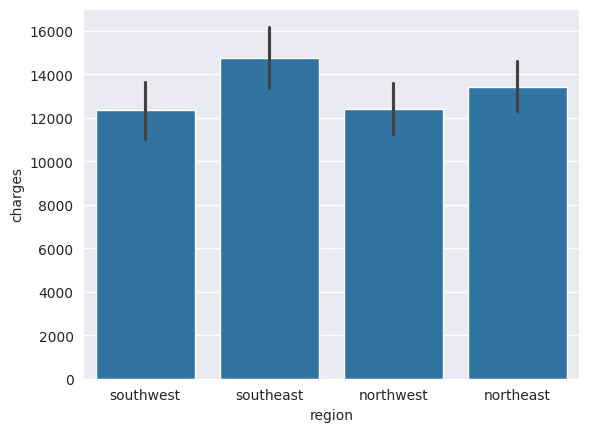

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


Loss: 6041.6796511744515
